In [1]:
!pip install datasets scikit-learn matplotlib

In [2]:
import datasets
imdb = datasets.load_dataset("imdb")

Reusing dataset imdb (/home/neeharika/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1)


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
imdb


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [4]:
train_set = imdb["train"]

In [5]:
train_set[0]


{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [6]:
train_set[24999]

{'text': 'The story centers around Barry McKenzie who must go to England if he wishes to claim his inheritance. Being about the grossest Aussie shearer ever to set foot outside this great Nation of ours there is something of a culture clash and much fun and games ensue. The songs of Barry McKenzie(Barry Crocker) are highlights.',
 'label': 1}

N positive:  12500
N negative:  12500


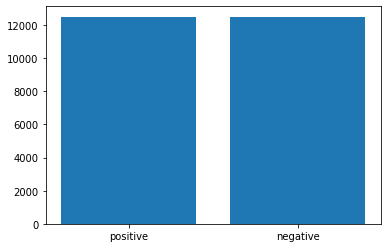

In [7]:
import matplotlib.pyplot as plt
n_positive_examples = sum(label == 1 for label in train_set["label"])
n_negative_examples = sum(label == 0 for label in train_set["label"])

plt.bar(x=["positive", "negative"], height=[n_positive_examples, n_negative_examples])
print("N positive: ", n_positive_examples)
print("N negative: ", n_negative_examples)

N positive:  12500
N negative:  12500


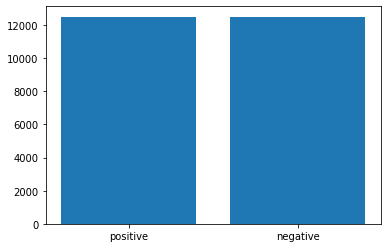

In [8]:
test_set = imdb["test"]
n_positive_examples = sum(label == 1 for label in test_set["label"])
n_negative_examples = sum(label == 0 for label in test_set["label"])

plt.bar(x=["positive", "negative"], height=[n_positive_examples, n_negative_examples])
print("N positive: ", n_positive_examples)
print("N negative: ", n_negative_examples)

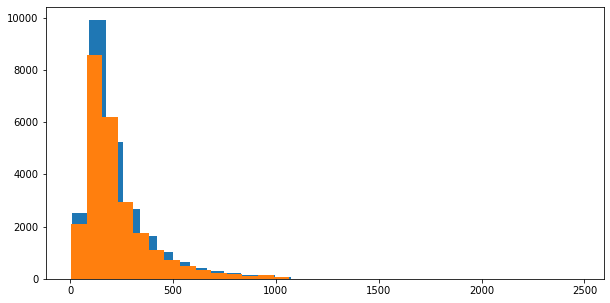

In [9]:
n_words_train = [len(text.split(" ")) for text in train_set["text"]]
n_words_test = [len(text.split(" ")) for text in test_set["text"]]

plt.figure(figsize=(10, 5))
plt.hist(n_words_train, bins=30, label="train")
plt.hist(n_words_test, bins=30, label="test");

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
count_vectorizer

CountVectorizer()

In [11]:
toy_texts = ["this is a small text", "this is another small text"]

count_vectorizer = count_vectorizer.fit(toy_texts)
count_vectorizer.vocabulary_

{'this': 4, 'is': 1, 'small': 2, 'text': 3, 'another': 0}

In [12]:
count_vectorizer.transform(["text"]).todense()

matrix([[0, 0, 0, 1, 0]])

In [13]:
count_vectorizer.transform(["text text"]).todense()

matrix([[0, 0, 0, 2, 0]])

In [14]:
# vectorizing a text with a OOV word
# ignores the new words
OOV = ["this is a big text"]
count_vectorizer = count_vectorizer.fit(OOV)
count_vectorizer.vocabulary_

{'this': 3, 'is': 1, 'big': 0, 'text': 2}

In [15]:
# vectorizing a text that only has OOV words
OOV = ["all the words are new"]
count_vectorizer = count_vectorizer.fit(OOV)
count_vectorizer.vocabulary

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer = tfidf_vectorizer.fit(toy_texts)
tfidf_vectorizer.vocabulary_

{'this': 4, 'is': 1, 'small': 2, 'text': 3, 'another': 0}

In [17]:
tfidf_vectorizer.transform(["text"]).todense()

matrix([[0., 0., 0., 1., 0.]])

In [18]:
print("Count Vector:", count_vectorizer.transform(["another text"]).todense())
print("Count Vector:", tfidf_vectorizer.transform(["another text"]).todense())

Count Vector: [[0 0 0 0 0]]
Count Vector: [[0.81480247 0.         0.         0.57973867 0.        ]]


In [19]:
vectorizer = CountVectorizer()
vectorizer = vectorizer.fit(train_set["text"])
len(vectorizer.vocabulary_)

74849

In [20]:
vectorized_texts = vectorizer.transform(train_set["text"])
vectorized_texts.shape

(25000, 74849)

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(vectorized_texts, train_set["label"])

/home/neeharika/miniconda3/envs/nlp_class/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [22]:
def predict_sentiment(text, model, vectorizer):
    text_vector = vectorizer.transform([text])
    prediction = model.predict(text_vector)[0]
    if prediction == 1:
        return "Positive"
    return "Negetive"

In [23]:
predict_sentiment("this is an amazing movie!", model, vectorizer)

'Positive'

In [24]:
predict_sentiment("this is a horrible movie!", model, vectorizer)

'Negetive'

In [25]:
predict_sentiment("this is not a good movie!", model, vectorizer)

'Positive'

In [26]:
predict_sentiment("this is not a horrible movie!", model, vectorizer)

'Negetive'

In [27]:
from sklearn.metrics import accuracy_score

vectorized_texts_test = vectorizer.transform(test_set["text"])
test_set_predictions = model.predict(vectorized_texts_test)

print("Test accuracy is ", accuracy_score(y_true=test_set["label"], y_pred=test_set_predictions))

Test accuracy is  0.86408


In [28]:
#vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(2, 2), min_df=1,sublinear_tf=True)
vectorizer = TfidfVectorizer(ngram_range=(1, 2),min_df=5,sublinear_tf=True)
X = vectorizer.fit_transform(train_set["text"])
y = train_set["label"]
vectorized_texts = vectorizer.transform(train_set["text"])

In [29]:
#both solver = "saga" and solver = "sag" are giving accuracy more than 90%
model = LogisticRegression(penalty='none',solver='saga')
#model = LogisticRegression(penalty="elasticnet",solver='saga',multi_class="ovr",fit_intercept=True,class_weight="balanced",random_state = 0, l1_ratio = 0.1)
model = model.fit(X, y)

/home/neeharika/miniconda3/envs/nlp_class/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [30]:
X_test = vectorizer.transform(test_set["text"])
y_test = test_set["label"]
model.score(X_test, y_test)  # computes accuracy

0.9046